In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D


c:\program files\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
N = 10000 # number of points per class
D = 3 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+2)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t), r * t * 2]
  y[ix] = j

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

### From Top

<IPython.core.display.Javascript object>


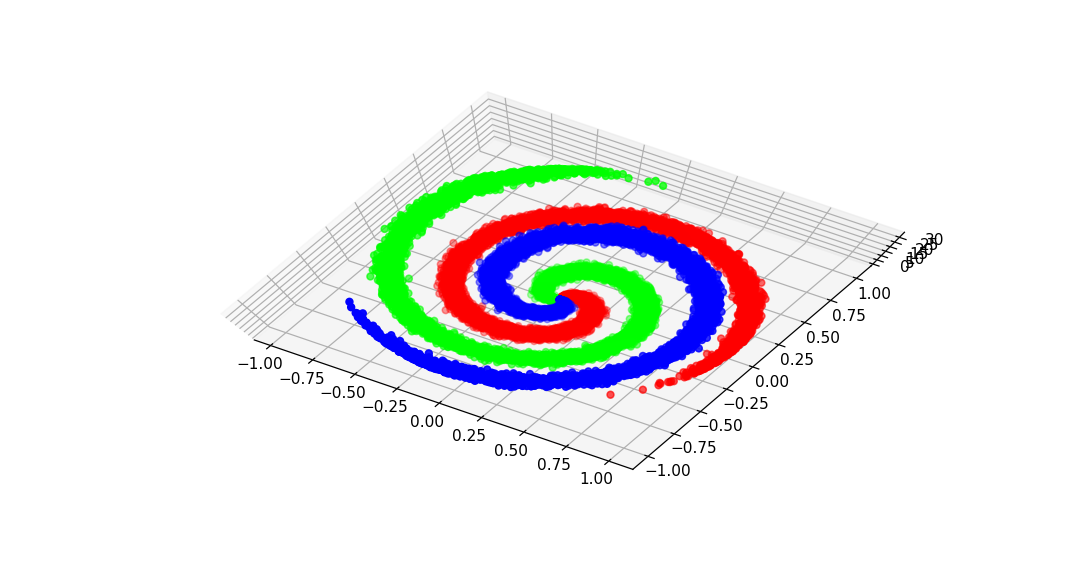

In [3]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y);

### From The Side

<IPython.core.display.Javascript object>


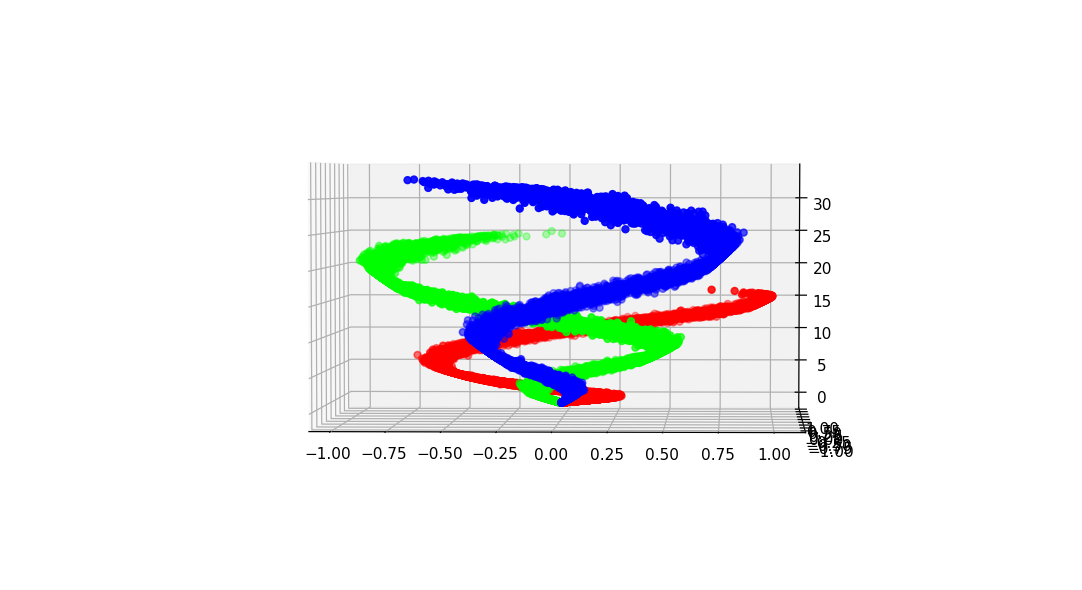

In [4]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y);

In [5]:
np.savetxt("train_dataset.csv", np.column_stack([X_train, y_train]), delimiter=",", header="x, y, z, class1, class2, class3")
np.savetxt("test_dataset.csv", np.column_stack([X_test, y_test]), delimiter=",", header="x, y, z, class1, class2, class3")